# FC Depth

Did not find File: ../bioplex_gcn_benchmark.tsv
Did not find File: ../bioplex_fac_benchmark.tsv


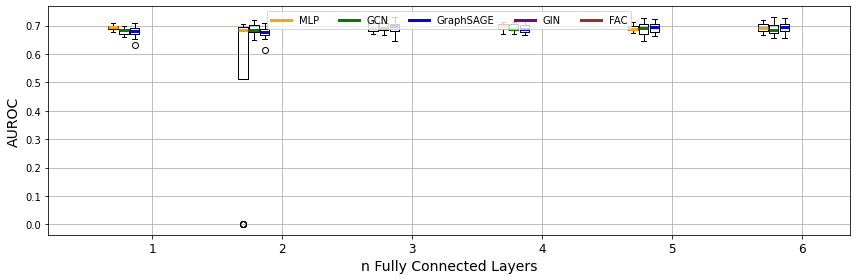

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
%matplotlib inline

methods = ["mlp","gcn","sage","gin","fac"]
#df_paths = ["../intactdirect_{}_benchmark.tsv".format(method) for method in methods]
df_paths = ["../bioplex_{}_benchmark.tsv".format(method) for method in methods]
#df_paths = ["../grndb_adipose_{}_benchmark.tsv".format(method) for method in methods]
num_folds = 4
repetitions = 4
num_metrics = 1
fig, ax = plt.subplots(num_metrics, 1, figsize=(12, 4))
used_methods = []

pretty_names = {"gin": "GIN",
                "sgcn": "sGCN", 
                "graphsage": "GraphSAGE",
                "sage": "GraphSAGE",
                "tag": "TAG",
                "gcn": "GCN",
                "transformer": "Transformer",
                "cheb": "Chebychev",
                "gat": "GAT",
                "mlp": "MLP",
                "fac": "FAC"}

colors = ["orange",
          "green",
          "blue",
          "purple",
          "brown",
          "red",
          "pink",
          "lightblue"]
          
patches = {}


runs = []

for k, df_path in enumerate(df_paths):
    step = num_folds * repetitions
    try:
        df = pd.read_csv(df_path, sep="\t", header=0, index_col=0)
        used_methods.append(methods[k])
    except FileNotFoundError:
        print("Did not find File: {}".format(df_path))
        continue
    df = df["auroc"]
    run = []
    for i, start in enumerate(range(0, len(df.index), step)):
        # each entry in run is one setting
        run.append(df[start:(start + step)].values)
        # each entry in runs is one method
    runs.append(run)

for i, (run, color) in enumerate(zip(runs, colors)):

    bp = ax.boxplot(run, positions=(np.arange(len(run))-0.3) + (i / (len(run) + 6)), widths=1 / (len(run) +8))

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)
   
all_mlps = [run[0] for run in runs]


#ax.fill_between(list(range(len(runs[0])-1)), np.quantile(all_mlps,0.25), np.quantile(all_mlps,0.75), color="gray", alpha=0.4, zorder=-1, transform=ax.get_yaxis_transform())


ax.set_ylabel("AUROC", fontsize=14)
ax.grid(True)
ax.set_xticks(range(len(runs[0])), np.arange(len(runs[0])) + 1, fontsize=12)
ax.set_xlabel('n Fully Connected Layers', fontsize=14)

custom_lines = [Line2D([0], [0], color=color, lw=3) for color in colors]
plt.legend(custom_lines,  [pretty_names[method] for method in methods], loc="upper center",ncol= len(custom_lines))
plt.tight_layout()
plt.savefig("benchmark_depth_bioplex.pdf", bbox_inches="tight")
plt.show()

# Convolution Depth

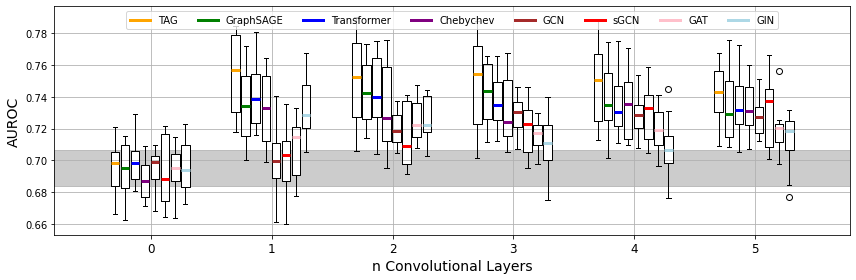

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
%matplotlib inline




methods = ["tag","graphsage","transformer","cheb","gcn","sgcn", "gat", "gin",]
df_paths = ["../intactdirect_{}_benchmark_depth.tsv".format(method) for method in methods]
num_folds = 4
repetitions = 4
num_metrics = 1
fig, ax = plt.subplots(num_metrics, 1, figsize=(12, 4))
used_methods = []

pretty_names = {"gin": "GIN",
                "sgcn": "sGCN", 
                "graphsage": "GraphSAGE",
                "tag": "TAG",
                "gcn": "GCN",
                "transformer": "Transformer",
                "cheb": "Chebychev",
                "gat": "GAT"}

colors = ["orange",
          "green",
          "blue",
          "purple",
          "brown",
          "red",
          "pink",
          "lightblue"]
          
patches = {}


runs = []

for k, (df_path, method) in enumerate(zip(df_paths, methods)):
    step = num_folds * repetitions
    try:
        df = pd.read_csv(df_path, sep="\t", header=0, index_col=0)
        #used_methods.append(methods[k])
        used_methods.append(method)
    except FileNotFoundError:
        print("Did not find File: {}".format(df_path))
        continue
    df = df["auroc"]
    run = []
    for i, start in enumerate(range(0, len(df.index), step)):
        # each entry in run is one setting
        run.append(df[start:(start + step)].values)
        # each entry in runs is one method
    runs.append(run)
    

for i, (run, color) in enumerate(zip(runs, colors)):

    bp = ax.boxplot(run, positions=(np.arange(len(run))-0.3) + (i / (len(run) + 6)), widths=1 / (len(run) +8))

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)
   
all_mlps = [run[0] for run in runs]


ax.fill_between(list(range(len(runs[0])-1)), np.quantile(all_mlps,0.25), np.quantile(all_mlps,0.75), color="gray", alpha=0.4, zorder=-1, transform=ax.get_yaxis_transform())


ax.set_ylabel("AUROC", fontsize=14)
ax.grid(True)
ax.set_xticks(range(len(runs[0])), np.arange(len(runs[0])), fontsize=12)
ax.set_xlabel('n Convolutional Layers', fontsize=14)

custom_lines = [Line2D([0], [0], color=color, lw=3) for _, color in zip(used_methods, colors)]
plt.legend(custom_lines,  [pretty_names[method] for method in used_methods], loc="upper center",ncol= len(custom_lines))
plt.tight_layout()
plt.savefig("benchmark_depth_intact.pdf", bbox_inches="tight")
plt.show()

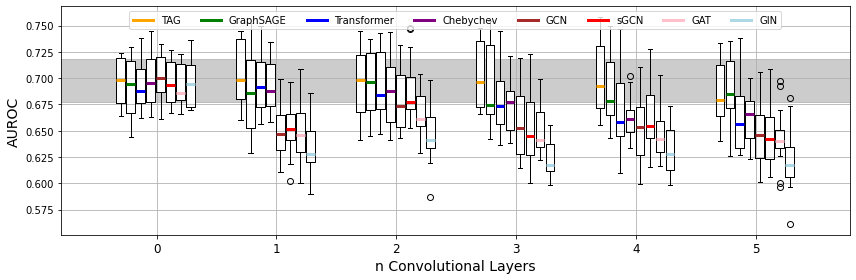

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
%matplotlib inline




methods = ["tag","graphsage","transformer","cheb","gcn","sgcn", "gat", "gin",]
df_paths = ["../bioplex_mr_{}_benchmark_depth.tsv".format(method) for method in methods]
num_folds = 4
repetitions = 4
num_metrics = 1
fig, ax = plt.subplots(num_metrics, 1, figsize=(12, 4))
used_methods = []

pretty_names = {"gin": "GIN",
                "sgcn": "sGCN", 
                "graphsage": "GraphSAGE",
                "tag": "TAG",
                "gcn": "GCN",
                "transformer": "Transformer",
                "cheb": "Chebychev",
                "gat": "GAT"}

colors = ["orange",
          "green",
          "blue",
          "purple",
          "brown",
          "red",
          "pink",
          "lightblue"]
          
patches = {}


runs = []

for k, df_path in enumerate(df_paths):
    step = num_folds * repetitions
    try:
        df = pd.read_csv(df_path, sep="\t", header=0, index_col=0)
        used_methods.append(methods[k])
    except FileNotFoundError:
        print("Did not find File: {}".format(df_path))
        continue
    df = df["auroc"]
    run = []
    for i, start in enumerate(range(0, len(df.index), step)):
        # each entry in run is one setting
        run.append(df[start:(start + step)].values)
        # each entry in runs is one method
    runs.append(run)

for i, (run, color) in enumerate(zip(runs, colors)):

    bp = ax.boxplot(run, positions=(np.arange(len(run))-0.3) + (i / (len(run) + 6)), widths=1 / (len(run) +8))

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)
   
all_mlps = [run[0] for run in runs]


ax.fill_between(list(range(len(runs[0])-1)), np.quantile(all_mlps,0.25), np.quantile(all_mlps,0.75), color="gray", alpha=0.4, zorder=-1, transform=ax.get_yaxis_transform())


ax.set_ylabel("AUROC", fontsize=14)
ax.grid(True)
ax.set_xticks(range(len(runs[0])), np.arange(len(runs[0])), fontsize=12)
ax.set_xlabel('n Convolutional Layers', fontsize=14)

custom_lines = [Line2D([0], [0], color=color, lw=3) for color in colors]
plt.legend(custom_lines,  [pretty_names[method] for method in methods], loc="upper center",ncol= len(custom_lines))
plt.tight_layout()
plt.savefig("benchmark_depth_bioplex.pdf", bbox_inches="tight")
plt.show()

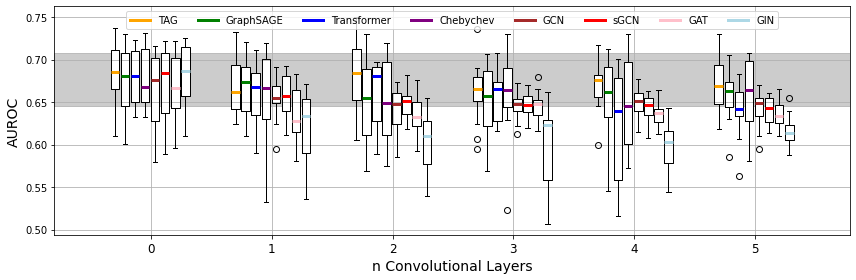

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
%matplotlib inline

methods = ["tag","graphsage","transformer","cheb","gcn","sgcn", "gat", "gin",]
df_paths = ["../grndb_adipose_{}_benchmark_depth.tsv".format(method) for method in methods]
num_folds = 4
repetitions = 4
num_metrics = 1
fig, ax = plt.subplots(num_metrics, 1, figsize=(12, 4))
used_methods = []

pretty_names = {"gin": "GIN",
                "sgcn": "sGCN", 
                "graphsage": "GraphSAGE",
                "tag": "TAG",
                "gcn": "GCN",
                "transformer": "Transformer",
                "cheb": "Chebychev",
                "gat": "GAT"}

colors = ["orange",
          "green",
          "blue",
          "purple",
          "brown",
          "red",
          "pink",
          "lightblue"]
patches = {}


runs = []

for k, df_path in enumerate(df_paths):
    step = num_folds * repetitions
    try:
        df = pd.read_csv(df_path, sep="\t", header=0, index_col=0)
        used_methods.append(methods[k])
    except FileNotFoundError:
        print("Did not find File: {}".format(df_path))
        continue
    df = df["auroc"]
    run = []
    for i, start in enumerate(range(0, len(df.index), step)):
        # each entry in run is one setting
        run.append(df[start:(start + step)].values)
        # each entry in runs is one method
    runs.append(run)

for i, (run, color) in enumerate(zip(runs, colors)):

    bp = ax.boxplot(run, positions=(np.arange(len(run))-0.3) + (i / (len(run) + 6)), widths=1 / (len(run) +8))

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)
   
all_mlps = [run[0] for run in runs]


ax.fill_between(list(range(len(runs[0])-1)), np.quantile(all_mlps,0.25), np.quantile(all_mlps,0.75), color="gray", alpha=0.4, zorder=-1, transform=ax.get_yaxis_transform())


ax.set_ylabel("AUROC", fontsize=14)
ax.grid(True)
ax.set_xticks(range(len(runs[0])), np.arange(len(runs[0])), fontsize=12)
ax.set_xlabel('n Convolutional Layers', fontsize=14)

custom_lines = [Line2D([0], [0], color=color, lw=3) for color in colors]
plt.legend(custom_lines,  [pretty_names[method] for method in methods], loc="upper center",ncol= len(custom_lines))
plt.tight_layout()
plt.savefig("benchmark_depth_adipose.pdf", bbox_inches="tight")
plt.show()

# Concat / Skip

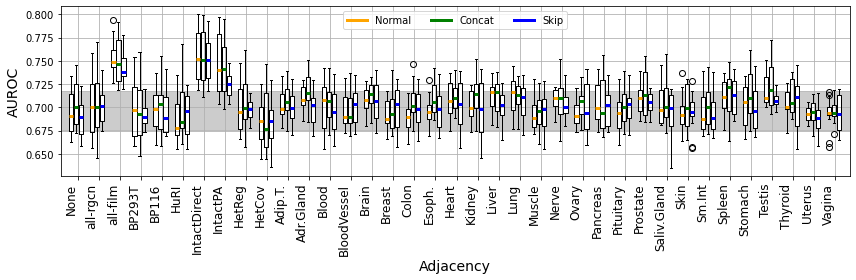

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
%matplotlib inline

toggle = "immu"
methods = ["normal","tag_concat","tag_skip"]
adjs = ["None","all-rgcn","all-film","BP293T", "BP116","HuRI","IntactDirect","IntactPA","HetReg","HetCov","Adip.T.","Adr.Gland","Blood","BloodVessel","Brain", "Breast","Colon","Esoph.","Heart","Kidney","Liver","Lung","Muscle","Nerve","Ovary","Pancreas","Pituitary","Prostate","Saliv.Gland","Skin","Sm.Int","Spleen","Stomach","Testis","Thyroid","Uterus","Vagina"]

df_paths = ["../adjacencies_{}_{}_benchmark_adj_tag_new.tsv".format(toggle, method) for method in methods]
df_paths[0] = "../adjacencies_{}_tag_benchmark_adj_tag_new.tsv".format(toggle)
num_folds = 4
repetitions = 4
num_metrics = 1
fig, ax = plt.subplots(num_metrics, 1, figsize=(12, 4))
used_methods = []

pretty_names = {"normal": "Normal",
                "tag_concat": "Concat",
                "tag_skip": "Skip",}

colors = ["orange",
          "green",
          "blue",
          "purple",
          "brown",
          "red",
          "pink",
          "lightblue"]
patches = {}


runs = []

for k, df_path in enumerate(df_paths):
    step = num_folds * repetitions
    try:
        df = pd.read_csv(df_path, sep="\t", header=0, index_col=0)
        used_methods.append(methods[k])
    except FileNotFoundError:
        print("Did not find File: {}".format(df_path))
        continue
    df = df["auroc"]
    run = []
    for i, start in enumerate(range(0, len(df.index), step)):
        # each entry in run is one setting
        run.append(df[start:(start + step)].values)
        # each entry in runs is one method
    runs.append(run)

for i, (run, color) in enumerate(zip(runs, colors)):

    bp = ax.boxplot(run, positions=(np.arange(len(run))-0.3) + (i / (len(runs)  *1.4)), widths=1 / (len(runs) *1.7))

    for median in bp['medians']:
        median.set(color=color,
        linewidth=3, solid_capstyle="butt")

    for artist in bp['boxes']:
        patch = mpatches.PathPatch(artist.get_path(), color="white")
        ax.add_artist(patch)
   
all_mlps = [run[0] for run in runs]


ax.fill_between(list(range(len(runs[0])-1)), np.quantile(all_mlps,0.25), np.quantile(all_mlps,0.75), color="gray", alpha=0.4, zorder=-1, transform=ax.get_yaxis_transform())


ax.set_ylabel("AUROC", fontsize=14)
ax.grid(True)
ax.set_xticks(range(len(adjs)), adjs, fontsize=12)
ax.set_xlabel('Adjacency', fontsize=14)


fig.autofmt_xdate(rotation=90)

custom_lines = [Line2D([0], [0], color=color, lw=3) for color in colors]
plt.legend(custom_lines,  [pretty_names[method] for method in methods], loc="upper center",ncol= len(custom_lines))
plt.tight_layout()
plt.savefig("benchmark_skip.pdf", bbox_inches="tight")
plt.show()